In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')
<bound method DataFrame.count of      Unnamed: 0  Age  Sex     ChestPain  ...  Slope   Ca        Thal  AHD
0             1   63    1       typical  ...      3  0.0       fixed   No
1             2   67    1  asymptomatic  ...      2  3.0      normal  Yes
2             3   67    1  asymptomatic  ...      2  2.0  reversable  Yes
3             4   37    1    nonanginal  ...      3  0.0      normal   No
4             5   41    0    nontypical  ...      1  0.0      normal   No
..          ...  ...  ...           ...  ...    ...  ...         ...  ...
297         298   57    0  asymptomatic  ...      2  0.0  reversable  Yes
298         299   45    1       typical  ...      2  0.0  reversable  Yes
299         300   68    1  asymptomatic  ...      2  2.0  reversable  Yes
300         301   57    1  asymptomatic  ...      2  1

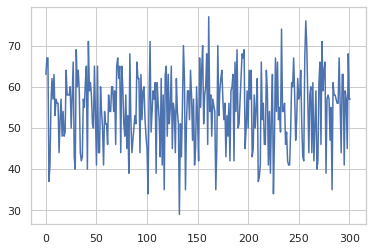

In [6]:
data=pd.read_csv("Heart.csv", header=0)
data=data.dropna()

print(data.columns)
print(data.count)

data['AHD'] = data['AHD'].replace(['Yes'],1)
data['AHD'] = data['AHD'].replace(['No'],0)

data['ChestPain']= data['ChestPain'].replace(['typical'],0)
data['ChestPain']= data['ChestPain'].replace(['asymptomatic'],1)
data['ChestPain']= data['ChestPain'].replace(['nonanginal'],2)
data['ChestPain']= data['ChestPain'].replace(['nontypical'],3)
data['Thal']= data['Thal'].replace(['fixed'],0)
data['Thal']= data['Thal'].replace(['normal'],1)
data['Thal']= data['Thal'].replace(['reversable'],2)
data['Thal']= data['Thal'].replace(['NA'],3)




print (data.head())
data.to_csv("Heart.csv", index=False)
#files.download("Heart.csv")
data['Age'].plot()
#data.plot(figsize=(20, 15))

In [ ]:
data.head(5)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,0


In [7]:
X = data.loc[:, data.columns != 'AHD']
Y = data.loc[:, data.columns == 'AHD']
X

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
columns = X_train.columns
columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')

In [8]:
X_train.shape

(237, 14)

In [9]:
X_test.shape

(60, 14)

In [10]:
Y_train.shape

(237, 1)

In [11]:
Y_test.shape

(60, 1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [13]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [14]:
knn.score(X_test, Y_test)

0.5166666666666667

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv, X, Y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.53333333 0.46666667 0.46666667 0.53333333 0.56666667 0.53333333
 0.46666667 0.55172414 0.44827586 0.62068966]
cv_scores mean:0.5187356321839081


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [16]:
from sklearn.model_selection import KFold
#print (X.shape)
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 27

In [17]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

Streaming output truncated to the last 5000 lines.
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296] [2]
[  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 20

In [18]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(3)

for train_index, test_index in lpo.split(X[:10]):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [3 4 5 6 7 8 9] TEST: [0 1 2]
TRAIN: [2 4 5 6 7 8 9] TEST: [0 1 3]
TRAIN: [2 3 5 6 7 8 9] TEST: [0 1 4]
TRAIN: [2 3 4 6 7 8 9] TEST: [0 1 5]
TRAIN: [2 3 4 5 7 8 9] TEST: [0 1 6]
TRAIN: [2 3 4 5 6 8 9] TEST: [0 1 7]
TRAIN: [2 3 4 5 6 7 9] TEST: [0 1 8]
TRAIN: [2 3 4 5 6 7 8] TEST: [0 1 9]
TRAIN: [1 4 5 6 7 8 9] TEST: [0 2 3]
TRAIN: [1 3 5 6 7 8 9] TEST: [0 2 4]
TRAIN: [1 3 4 6 7 8 9] TEST: [0 2 5]
TRAIN: [1 3 4 5 7 8 9] TEST: [0 2 6]
TRAIN: [1 3 4 5 6 8 9] TEST: [0 2 7]
TRAIN: [1 3 4 5 6 7 9] TEST: [0 2 8]
TRAIN: [1 3 4 5 6 7 8] TEST: [0 2 9]
TRAIN: [1 2 5 6 7 8 9] TEST: [0 3 4]
TRAIN: [1 2 4 6 7 8 9] TEST: [0 3 5]
TRAIN: [1 2 4 5 7 8 9] TEST: [0 3 6]
TRAIN: [1 2 4 5 6 8 9] TEST: [0 3 7]
TRAIN: [1 2 4 5 6 7 9] TEST: [0 3 8]
TRAIN: [1 2 4 5 6 7 8] TEST: [0 3 9]
TRAIN: [1 2 3 6 7 8 9] TEST: [0 4 5]
TRAIN: [1 2 3 5 7 8 9] TEST: [0 4 6]
TRAIN: [1 2 3 5 6 8 9] TEST: [0 4 7]
TRAIN: [1 2 3 5 6 7 9] TEST: [0 4 8]
TRAIN: [1 2 3 5 6 7 8] TEST: [0 4 9]
TRAIN: [1 2 3 4 7 8 9] TEST: [0 5 6]
T

**Logistic Regression**

In [19]:
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
logreg=LogisticRegression()
y_pred = sk.model_selection.cross_val_predict(logreg, X_test, Y_test, cv=10)
scores = cross_val_score(logreg, X_test, Y_test, scoring='accuracy', cv=10, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [21]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.917 (0.083)


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[29  1]
 [ 4 26]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.87      0.91        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [24]:
score_lr = round(accuracy_score(y_pred,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 91.67 %


NAIVE BAYES

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)
Y_pred_nb = sk.model_selection.cross_val_predict(nb, X_test, Y_test, cv=10)
scores_nb = cross_val_score(nb, X_test, Y_test, scoring='accuracy', cv=10, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [26]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.917 (0.083)


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_nb)
print(confusion_matrix)

[[25  5]
 [ 6 24]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.80      0.81        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [29]:
Y_pred_nb.shape

(60,)

In [30]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.67 %


**K NEAREST NEIGHBOR**

K = 3

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred_knn = sk.model_selection.cross_val_predict(knn, X_test, Y_test, cv=10)
scores_knn = cross_val_score(knn, X_test, Y_test, scoring='accuracy', cv=10, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y 

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_knn)
print(confusion_matrix)

[[17 13]
 [ 7 23]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        30
           1       0.64      0.77      0.70        30

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.66        60
weighted avg       0.67      0.67      0.66        60



In [34]:
Y_pred_knn.shape

(60,)

In [35]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 66.67 %


K = 5

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_knn = sk.model_selection.cross_val_predict(knn, X_test, Y_test, cv=10)
scores_knn = cross_val_score(knn, X_test, Y_test, scoring='accuracy', cv=10, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:841: DataConversionWarning: A column-vector y 

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_knn)
print(confusion_matrix)

[[15 15]
 [ 9 21]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        30
           1       0.58      0.70      0.64        30

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



In [43]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 60.0 %


LDA

In [45]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=10, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.867 (0.125)


Prediction/Classification

In [46]:
model.fit(X_test, Y_test)
Y_pred=model.predict(X_test[:4])
print (Y_pred)
Y_pred=Y_pred>0.2
print (Y_pred)

[0 0 1 0]
[False False  True False]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Controlling the posterior probabilty threshold for LDA

Threshold .9

In [47]:
probs_positive_class = model.predict_proba(X_test)[:, 1]
# say default is the positive class and we want to make few false positives
prediction = probs_positive_class > .9
print (prediction)

[False False False False False  True  True False  True False False False
 False  True False False  True False False  True  True  True False False
 False  True False False False False  True False  True  True False  True
 False False  True False False  True False False False  True  True False
 False False  True  True False False False  True False False  True False]


Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, model.predict(X_test))

array([[29,  1],
       [ 2, 28]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, model.predict(X_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [49]:
score_lda = round(accuracy_score(Y_test, model.predict(X_test))*100,2)

print("The accuracy score achieved using LDA is: "+str(score_lda)+" %")

The accuracy score achieved using LDA is: 95.0 %


Threhold 0.8

In [50]:
probs_positive_class = model.predict_proba(X_test)[:, 1]
# say default is the positive class and we want to make few false positives
prediction = probs_positive_class > 0.8
print (prediction)

[False False False False False  True  True False  True False  True False
 False  True False False  True False  True  True  True  True False False
 False  True False False False False  True False  True  True False  True
 False  True  True False False  True False False False  True  True False
 False False  True  True  True False False  True False False  True False]


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, model.predict(X_test))

array([[29,  1],
       [ 2, 28]])

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [53]:
score_lda = round(accuracy_score(Y_test, model.predict(X_test))*100,2)

print("The accuracy score achieved using LDA is: "+str(score_lda)+" %")

The accuracy score achieved using LDA is: 95.0 %
